# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-26 22:33:38--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-26 22:33:38--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:
print("Primeras filas del DataFrame:")
print(data.head())
print("\nInformación general del DataFrame:")
print(data.info())
print("\nVerificación de datos nulos:")
print(data.isnull().sum())

Primeras filas del DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column  

## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

Total de Quantity por país:
Country
Australia    83653
Austria       4827
Bahrain        260
Belgium      23152
Brazil         356
Name: Quantity, dtype: int64

Media de UnitPrice por país:
Country
Australia    3.220612
Austria      4.243192
Bahrain      4.556316
Belgium      3.644335
Brazil       4.456250
Name: UnitPrice, dtype: float64


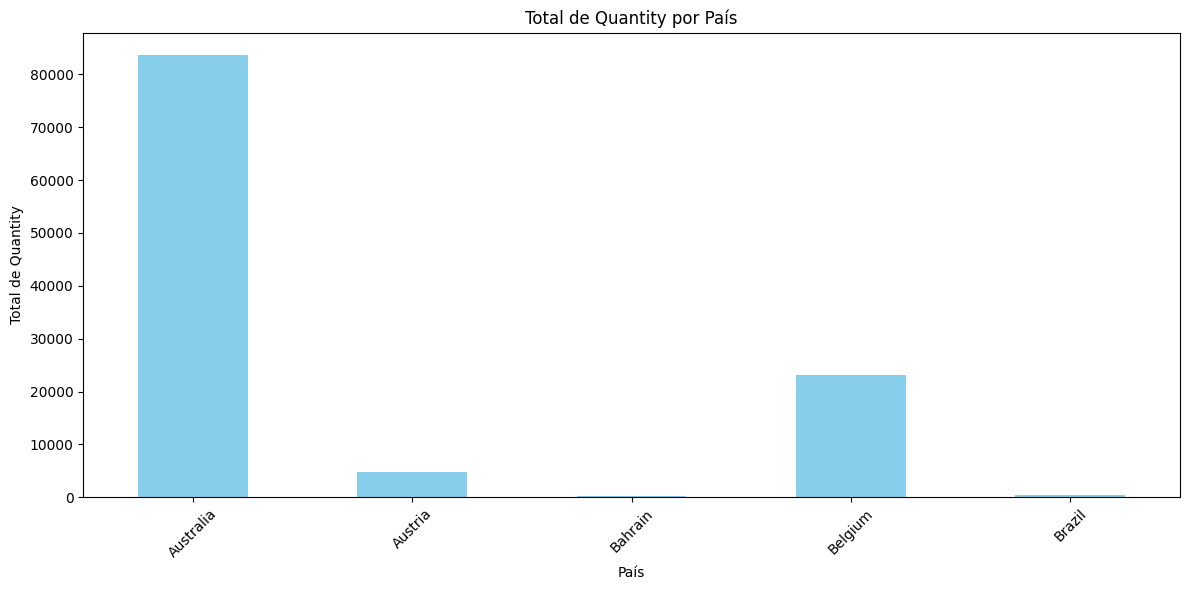

In [6]:
otal_quantity_by_country = data.groupby('Country')['Quantity'].sum()
print("Total de Quantity por país:")
print(total_quantity_by_country.head())
mean_unit_price_by_country = data.groupby('Country')['UnitPrice'].mean()
print("\nMedia de UnitPrice por país:")
print(mean_unit_price_by_country.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
total_quantity_by_country.head().plot(kind='bar', color='skyblue')
plt.title('Total de Quantity por País')
plt.xlabel('País')
plt.ylabel('Total de Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

Frecuencia de StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64


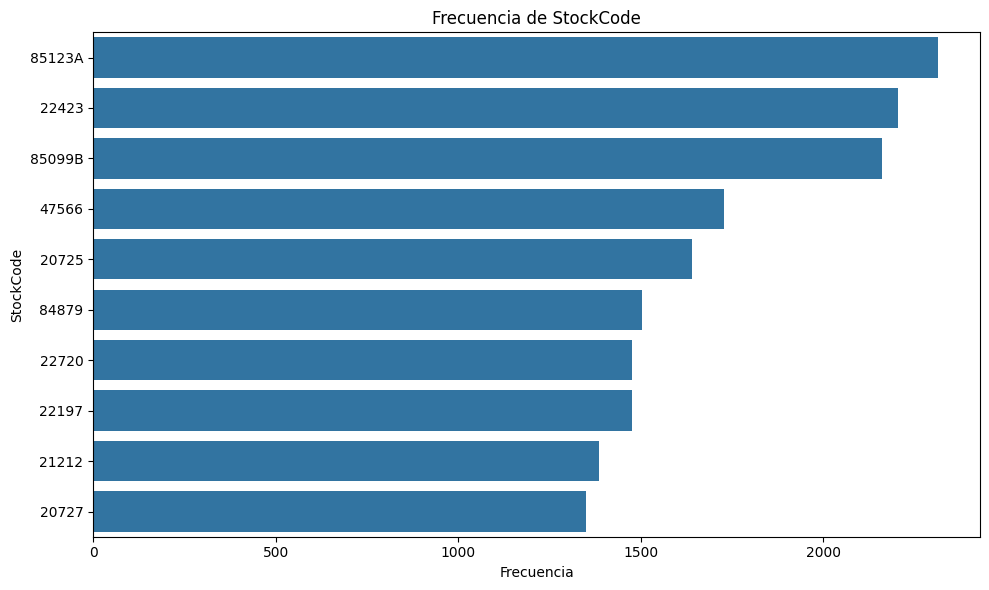

In [7]:
frecuencia_stock_code = data['StockCode'].value_counts()
print("Frecuencia de StockCode:")
print(frecuencia_stock_code.head(10))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_stock_code.head(10).values, y=frecuencia_stock_code.head(10).index, orient='h')
plt.title('Frecuencia de StockCode')
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

DataFrame con la columna TotalPrice
  InvoiceNo  Quantity  UnitPrice  TotalPrice
0    536365         6       2.55       15.30
1    536365         6       3.39       20.34
2    536365         8       2.75       22.00
3    536365         6       3.39       20.34
4    536365         6       3.39       20.34

Ventas totales por factura:
InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
Name: TotalPrice, dtype: float64

Factura promedio:
376.3609240926641


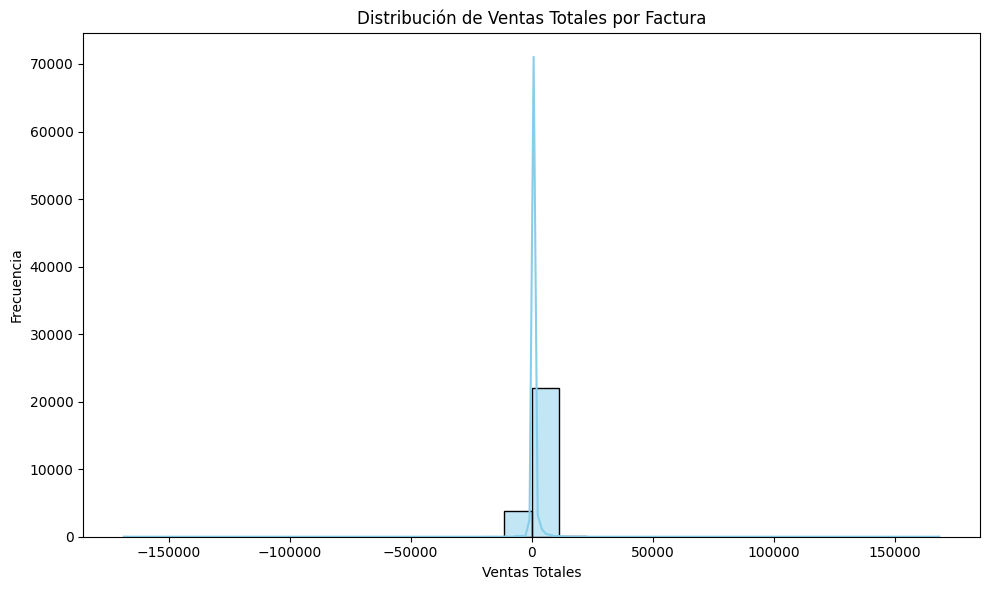

In [8]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
print("DataFrame con la columna TotalPrice")
print(data[['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']].head())
ventas_por_factura = data.groupby('InvoiceNo')['TotalPrice'].sum()
print("\nVentas totales por factura:")
print(ventas_por_factura.head())
factura_promedio = ventas_por_factura.mean()
print("\nFactura promedio:")
print(factura_promedio)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ventas_por_factura, bins=30, kde=True, color='skyblue')
plt.title('Distribución de Ventas Totales por Factura')
plt.xlabel('Ventas Totales')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

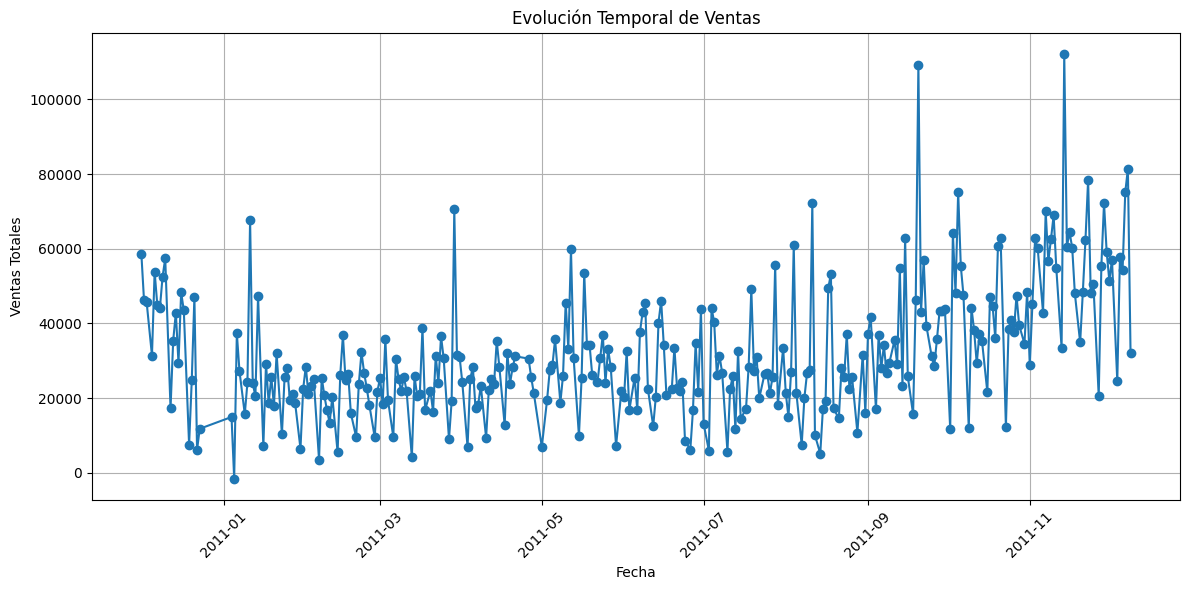

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
ventas_por_fecha = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_fecha.index, ventas_por_fecha.values, marker='o', linestyle='-')
plt.title('Evolución Temporal de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

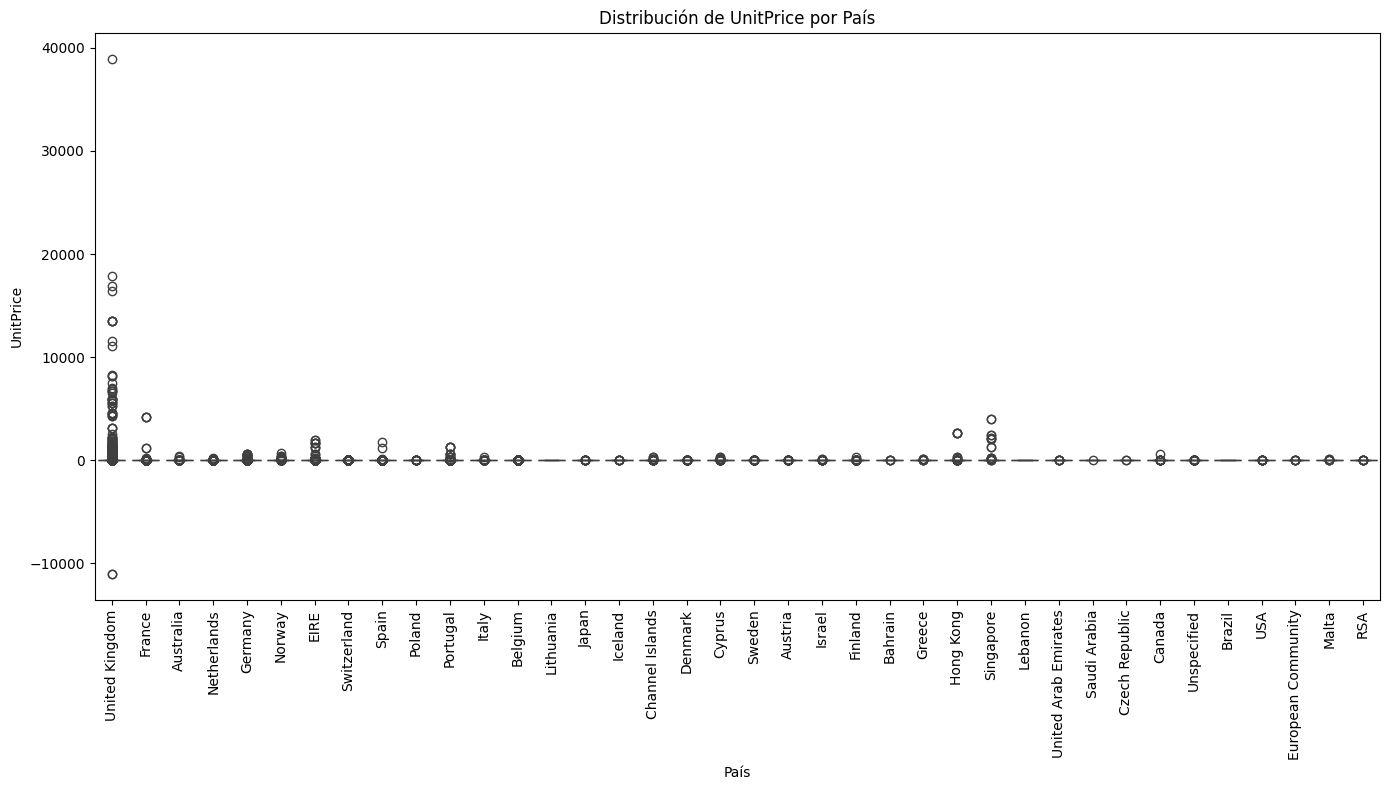

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.title('Distribución de UnitPrice por País')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

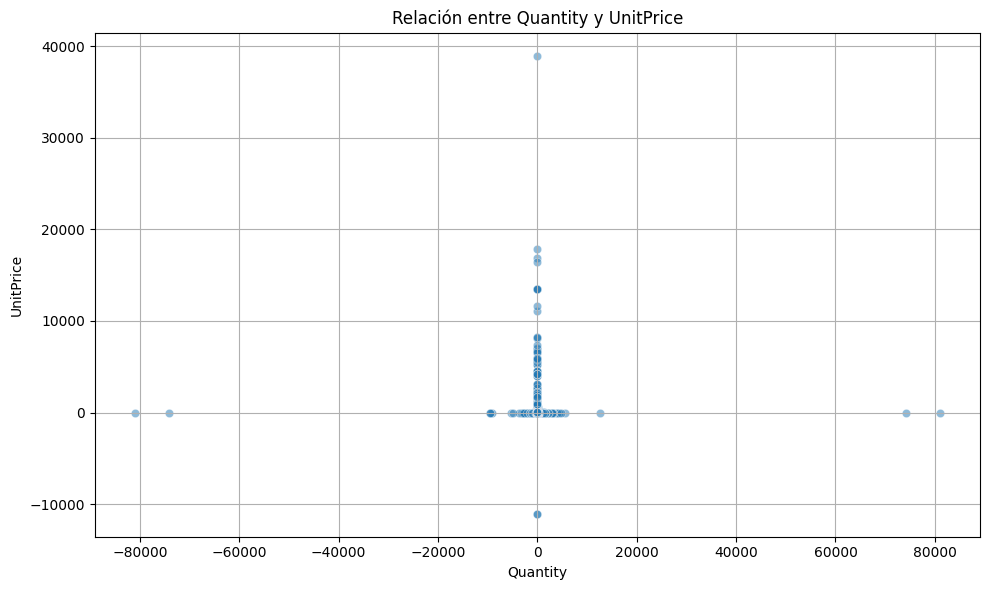

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data, alpha=0.5)
plt.title('Relación entre Quantity y UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

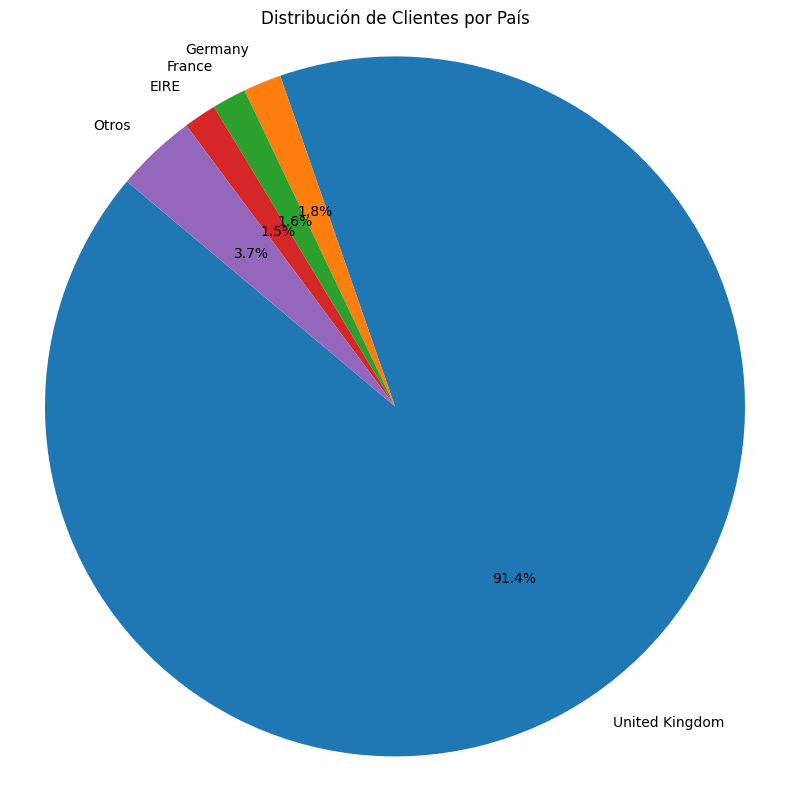

In [12]:
conteo_por_pais = data['Country'].value_counts(normalize=True) * 100
paises_significativos = conteo_por_pais[conteo_por_pais >= 1]
otros_paises = conteo_por_pais[conteo_por_pais < 1].sum()
if otros_paises > 0:
    paises_significativos['Otros'] = otros_paises
plt.figure(figsize=(8, 8))
plt.pie(paises_significativos, labels=paises_significativos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clientes por País')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

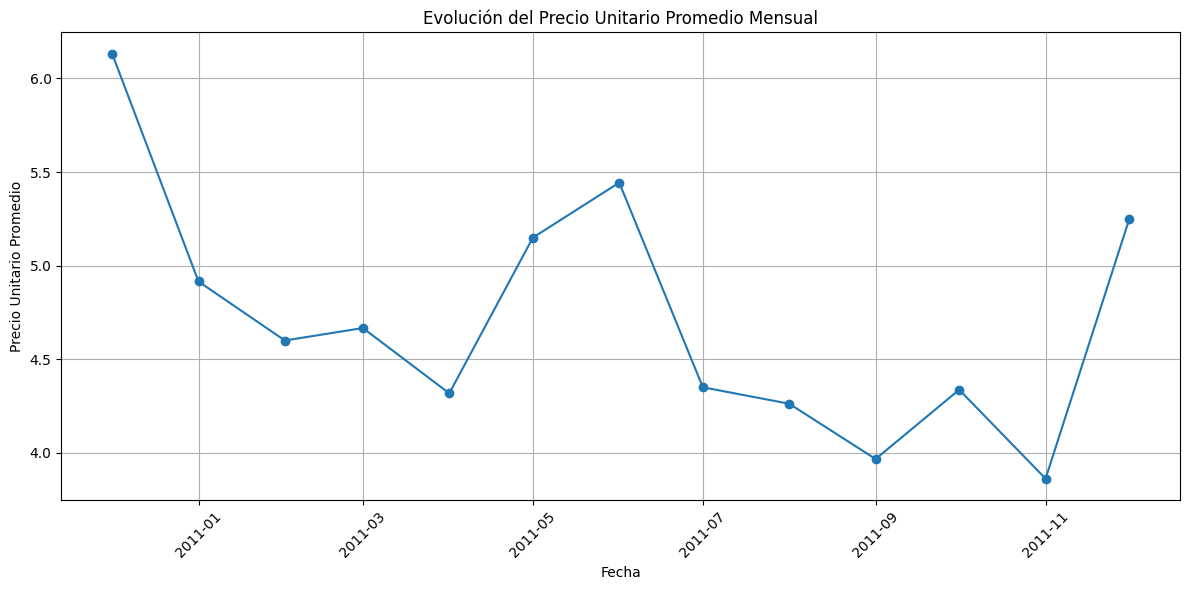

In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.to_period('M')
precio_unitario_promedio = data.groupby('Month')['UnitPrice'].mean()
plt.figure(figsize=(12, 6))
plt.plot(precio_unitario_promedio.index.to_timestamp(),
         precio_unitario_promedio.values, marker='o', linestyle='-')
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.xlabel('Fecha')
plt.ylabel('Precio Unitario Promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

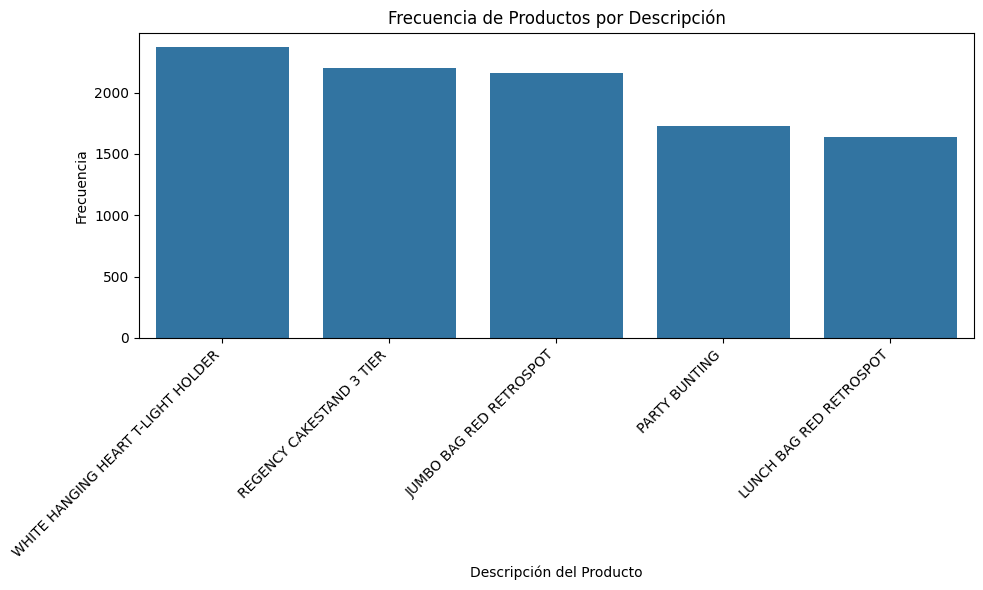

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

frecuencia_productos = data['Description'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_productos.index, y=frecuencia_productos.values)
plt.title('Frecuencia de Productos por Descripción')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.